In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("C:/Users/aardr/Downloads/Resume.csv")

In [24]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [25]:
#job_descriptions

In [26]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the web page you want to scrape
url = "https://huggingface.co/datasets/jacob-hugging-face/job-descriptions/viewer/default/train?row=26"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    print(soup)


<!DOCTYPE html>

<html class="">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="We’re on a journey to advance and democratize artificial intelligence through open source and open science." name="description"/>
<meta content="1321688464574422" property="fb:app_id"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@huggingface" name="twitter:site"/>
<meta content="jacob-hugging-face/job-descriptions · Datasets at Hugging Face" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://huggingface.co/datasets/jacob-hugging-face/job-descriptions/viewer/default/train" property="og:url"/>
<meta content="https://huggingface.co/front/thumbnails/datasets-viewer.png" property="og:image"/>
<link href="/front/build/kube-70e3472/style.css" rel="stylesheet"/>
<link href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://fonts.googleapis.com/

In [27]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the web page you want to scrape
url = "https://huggingface.co/datasets/jacob-hugging-face/job-descriptions/viewer/default/train?row=26"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the job descriptions
    job_description_table = soup.find('table')

    # Extract the text from the 'job_description' column (assuming it's the second column)
    job_descriptions = []
    for row in job_description_table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        if len(columns) >= 2:
            job_description = columns[1].get_text()
            job_descriptions.append(job_description)

    # Print the first 15 job descriptions
    for description in job_descriptions[:15]:
        print(description)
else:
    print("Failed to retrieve the web page. Status code:", response.status_code)


"minimum qualifications
bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managing enterprise accounts with sales cycles
preferred qualifications
 years of experience building strategic business partnerships with enterprise customersability to work through and with a reseller ecosystem to scale the businessability to plan pitch and execute a territory business strategyability to build relationships and to deliver results in a crossfunctionalmatrixed environmentability to identify crosspromoting and uppromoting opportunities within the existing account baseexcellent account management writtenverbal communication strategic and analyticalthinking skills
about the job
as a member of the google cloud team you inspire leading companies schools and government agencies to work smarter with google tools like google workspace search and chrome you advocate the innovative power of our products to make organizations more produc

In [28]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the web page you want to scrape
url = "https://huggingface.co/datasets/jacob-hugging-face/job-descriptions/viewer/default/train?row=26"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the job descriptions
    job_description_table = soup.find('table')

    # Extract the text from the 'job_description' column (assuming it's the second column)
    job_descriptions = []
    for row in job_description_table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        if len(columns) >= 2:
            job_description = columns[1].get_text()
            job_descriptions.append(job_description)

    # Write the first 15 job descriptions to a text file
    with open("job_descriptions.txt", "w", encoding="utf-8") as file:
        for description in job_descriptions[:15]:
            file.write(description + "\n")

    print("Job descriptions saved to 'job_descriptions.txt'")
else:
    print("Failed to retrieve the web page. Status code:", response.status_code)


Job descriptions saved to 'job_descriptions.txt'


In [29]:
import nltk
stemmer = nltk.stem.porter.PorterStemmer()

In [30]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # stemming
    txt = [stemmer.stem(w) for w in txt]

    return ' '.join(txt)

In [31]:
import re
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))
df.pop('Resume_str')
df

,ID,Resume_html,Category,Resume
0,16852973,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administr market associ hr administr summar...
1,22323967,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr oper summari versatil medi...
2,33176873,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summari year experi recruit plu ye...
3,27018550,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summari dedic driven dynam year ...
4,17812897,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manag skill highlight hr skill hr depart st...
...,...,...,...,...
2479,99416532,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgt e non commiss offic charg brigad mail...
2480,24589765,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,govern relat commun organiz develop director p...
2481,31605080,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent profession profil support spe...
2482,21190805,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director offic manag summari highli pe...


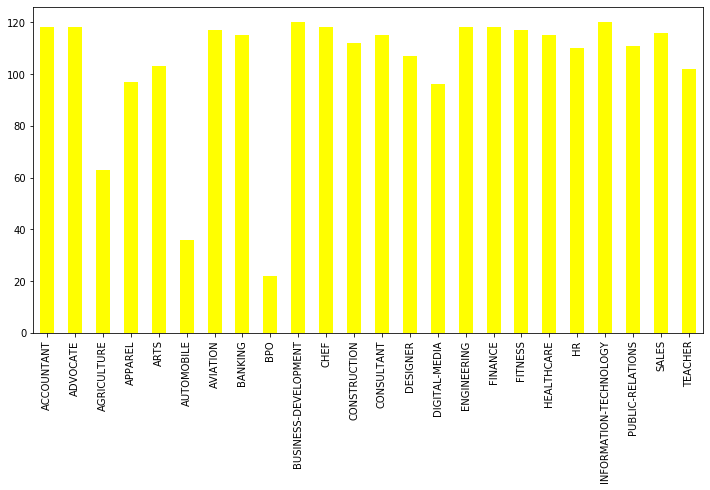

In [32]:
import matplotlib.pyplot as plt

df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6),color="yellow")
plt.show()

In [33]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aardr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aardr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aardr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
def remove_stop_words (text):
      result = []
      for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
          result.append(token)

      return result

In [36]:
def resume_cleaning(text):
    
    # Remove HTML tags 
    cleaned_text = re.sub(r'<.*?>', ' ', text)
    
    # Remove non-english characters, punctuation,special characters, digits, continous underscores and extra whitespace
    cleaned_text = re.sub('[^a-zA-Z]', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]|_', ' ', cleaned_text)
    cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text=re.sub('http\S+\s', " ", cleaned_text)
    
    
    
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text

In [39]:
# Read the job descriptions from a text file and split by double quotes
with open("C:/Users/aardr/Desktop/job_descriptions.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Split the text by double quotes to get individual job descriptions
job_descriptions = [job.strip() for job in text.split('"') if job.strip()]

# Display the job descriptions
for i, job_desc in enumerate(job_descriptions, 1):
    print(f"Job Description {i}:\n{job_desc}\n")


Job Description 1:
minimum qualifications
bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managing enterprise accounts with sales cycles
preferred qualifications
 years of experience building strategic business partnerships with enterprise customersability to work through and with a reseller ecosystem to scale the businessability to plan pitch and execute a territory business strategyability to build relationships and to deliver results in a crossfunctionalmatrixed environmentability to identify crosspromoting and uppromoting opportunities within the existing account baseexcellent account management writtenverbal communication strategic and analyticalthinking skills
about the job
as a member of the google cloud team you inspire leading companies schools and government agencies to work smarter with google tools like google workspace search and chrome you advocate the innovative power of our products to make organiz

In [40]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the resume dataset and select the first 100 rows
df = pd.read_csv("C:/Users/aardr/Downloads/Resume.csv").head(100)

# Initialize DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

# Function to calculate cosine similarity
def calculate_cosine_similarity(job_desc_embedding, cv_embedding):
    job_desc_embedding_2d = job_desc_embedding.reshape((1, -1))
    cv_embedding_2d = cv_embedding.reshape((1, -1))
    similarity = cosine_similarity(job_desc_embedding_2d, cv_embedding_2d)[0][0]
    return similarity

# Define your job_descriptions here
job_descriptions = ["Job description 1", "Job description 2", "Job description 3"]

# Match CVs to job descriptions
matches = {}

for job_desc in job_descriptions:
    job_desc_tokens = tokenizer.encode(job_desc, add_special_tokens=True, max_length=512, truncation=True, padding='max_length')
    job_desc_embedding = model(torch.tensor(job_desc_tokens).unsqueeze(0))[0]

    similarity_scores = []

    for index, row in df.iterrows():
        cv_text = row['Resume_str']
        cv_tokens = tokenizer.encode(cv_text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length')
        cv_embedding = model(torch.tensor(cv_tokens).unsqueeze(0))[0]

        similarity = calculate_cosine_similarity(job_desc_embedding.detach().numpy(), cv_embedding.detach().numpy())
        similarity_scores.append((row['Category'], similarity))

    # Sort by similarity score in descending order
    similarity_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the top 5 matches
    top_matches = similarity_scores[:5]

    matches[job_desc] = top_matches

# Print the top 5 matches for each job description
for job_desc, top_matches in matches.items():
    print(f"Job Description:\n{job_desc}\n")
    print("Top 5 CV Matches:")
    for i, (category, similarity) in enumerate(top_matches, 1):
        print(f"{i}. Category: {category}, Similarity: {similarity:.4f}")
    print("\n")


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Job Description:
Job description 1

Top 5 CV Matches:
1. Category: HR, Similarity: 0.5417
2. Category: HR, Similarity: 0.3426
3. Category: HR, Similarity: 0.2925
4. Category: HR, Similarity: 0.2884
5. Category: HR, Similarity: 0.2858


Job Description:
Job description 2

Top 5 CV Matches:
1. Category: HR, Similarity: 0.5416
2. Category: HR, Similarity: 0.3427
3. Category: HR, Similarity: 0.2925
4. Category: HR, Similarity: 0.2885
5. Category: HR, Similarity: 0.2858


Job Description:
Job description 3

Top 5 CV Matches:
1. Category: HR, Similarity: 0.5417
2. Category: HR, Similarity: 0.3427
3. Category: HR, Similarity: 0.2924
4. Category: HR, Similarity: 0.2885
5. Category: HR, Similarity: 0.2861


